## Système linéaire

<p class="fragment fade-left">1) On considère  : </p>
<p class="fragment fade-left">
$$
 (S_m)\quad \left\{
 \begin{matrix}
 (1+m)x_1 & + & x_2 & + & x_3 & = & 1 \\
 x_1 & + & (1+m)x_2 & + & x_3 & = & 0 \\
 x_1 & + &x_2  & + & (1+m)x_3 & = & 1
 \end{matrix}
 \right.
 $$ </p>
 <p class="fragment fade-left"> <span class="fragment">Avec </span> <span class="fragment">$$m\in \mathbb{R}$$ </span></p>

$$
  A_m = 
  \begin{pmatrix}
  1+m & 1 & 1 \\
  1 & 1+m & 1 \\
  1 & 1 & 1+m
  \end{pmatrix} \,,
  \qquad b =
  \begin{pmatrix}
  1 \\ 0 \\ 1 
  \end{pmatrix} \,.
$$

In [1]:
from __future__ import division
from sympy import *
x, y, z, t = symbols('x y z t')
k, m, n = symbols('k m n', integer=True)
f, g, h = symbols('f g h', cls=Function)
init_printing() # doctest: +SKIP
from fractions import Fraction
from IPython.display import display, Latex

In [2]:
m = Symbol('m')


In [23]:
def enonceAB():
    n = int(input(("Enter la dimension n : ")))
    A = [[0 for j in range(n+1)] for i in range(n)]
    # Read input data    
    for i in range(0, n):        
        line = input("Saisir la ligne {} : ".format(i)).split(" ")
        for j, el in enumerate(line):
            A[i][j] = el   
    lastLine =input("Donner le vecteur b (transposé) : ").split(" ")
    for j, el in enumerate(lastLine):
        A[j][n]=el
    #Print input
    pprintAB(A)       
    return A
def pprintAB(A):
    n = len(A)
    for i in range(0, n):
        line = ""
        for j in range(0, n+1):
            line += str(A[i][j]) + "\t"
            if j == n-1:
                line += "| "
        print(line)
    print("")

In [26]:
def enonceA():
    global n 
    n = int(input(("Enter la dimension n : ")))
    A = [[0 for j in range(n)] for i in range(n)]
    # Read input data    
    for i in range(0, n):        
        line = input("Saisir la ligne {} : ".format(i)).split(" ")
        for j, el in enumerate(line):
            A[i][j] = el         
    return A
def pprintA(A):
    n,m = A.rows,A.cols
    for i in range(0, n):
        line = ""
        for j in range(0, m):
            line += str(A.row(i)[j]) + "\t"
            if j == n-1:
                line += "| "+ "\t"
        print(line)
    print("")

In [27]:
def gg(A):
    B=Matrix(A).col_insert(len(A),eye(len(A)))
    #pprint(B)
    display(Latex(f'$A={latex(B[:,:n])}\quad I_{n}={latex(B[:,n:-1])}\quad b={latex(B[:,-1])} $'))
    print('===================================================')   
    for i in range(len(A)):
        if B.row(i)[i]==0 or isinstance(B.row(i)[i],Mul) or isinstance(B.row(i)[i],Add) or isinstance(B.row(i)[i],Symbol):
        #if B.row(i)[i]==0:
            for k in range(i+1, len(A)):
                
                if B.row(k)[i] !=0 and not(isinstance(B.row(k)[i],Mul) or isinstance(B.row(k)[i],Add) or isinstance(B.row(k)[i],Symbol)):
                    B=B.elementary_row_op('n<->m',row1=k, row2=i)
                    print(' -------- Permutation L{} <--> L{} --------'.format(k+1,i+1))
                    display(Latex("$L_{} \leftrightarrow L_{}$".format(k+1,i+1)))
                    #print("L{} <--> L{} ".format(k+1,i+1))
                    display(Latex(f'${latex(B[:,:n])}\quad {latex(B[:,n:-1])}\quad {latex(B[:,-1])} $'))
                    break;
            else:
                if B.row(i)[i]==0:
                    print('La matrice n''est pas inversible')
                    return None
        else :
            print(' --------------- Pas de permutation ---------------')
        if B.row(i)[i]!=1:
            #print("L{} <-- ({})*L{}".format(i+1,simplify(1/B.row(i)[i]),i+1))
            display(Latex("$L_{} \leftarrow ({})L_{}$".format(i+1,latex(simplify(1/B.row(i)[i])),i+1)))
            simplify(B.zip_row_op(i, i, lambda v, u: simplify(1/B.row(i)[i]*u)));
            display(Latex(f'${latex(B[:,:n])}\quad {latex(B[:,n:-1])}\quad {latex(B[:,-1])} $'))   
        for j in range(len(A)):
            if j!=i and (B.row(j)[i]!=0):
                #print("L{} <-- L{} +({})*L{}".format(j+1,j+1,simplify(-B.row(j)[i]/B.row(i)[i]),i+1))
                display(Latex("$L_{} \leftarrow L_{}+({})L_{}$".format(j+1,j+1,latex(simplify(-B.row(j)[i]/B.row(i)[i])),i+1)))
                simplify(B.zip_row_op(j, i, lambda v, u: simplify(v -B.row(j)[i]/B.row(i)[i] *u)));
                display(Latex(f'${latex(B[:,:n])}\quad {latex(B[:,n:-1])} \quad {latex(B[:,-1])}$'))                
        print('===================================================')
    return B[:,n:]    

In [28]:
A=enonceA()


Enter la dimension n : 3
Saisir la ligne 0 : 1 m m
Saisir la ligne 1 : m 1 m
Saisir la ligne 2 : m m 1


In [29]:
list(map(conv,['1+m','2/3']))

['1+m', '2/3']

<IPython.core.display.Latex object>

 --------------- Pas de permutation ---------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

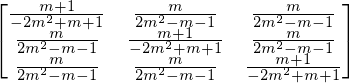

In [30]:
gg(A)